In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Load your dataset (pipe-separated)
df = pd.read_csv(r"C:\Users\ZAK-TECH\Desktop\KAIM week 3\End-to-End-Insurance-Risk-Analytic\data\MachineLearningRating_v3.txt", sep="|")

df.head()


C:\Users\ZAK-TECH\AppData\Local\Temp\ipykernel_22364\1057217091.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\ZAK-TECH\Desktop\KAIM week 3\End-to-End-Insurance-Risk-Analytic\data\MachineLearningRating_v3.txt", sep="|")


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [3]:
# Descriptive statistics for numerical columns
numerical_cols = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm', 'CustomValueEstimate', 'CapitalOutstanding']  # add more if relevant
print(df[numerical_cols].describe())


# Data types
print(df.dtypes)

       TotalPremium   TotalClaims    SumInsured  CalculatedPremiumPerTerm  \
count  1.000098e+06  1.000098e+06  1.000098e+06              1.000098e+06   
mean   6.190550e+01  6.486119e+01  6.041727e+05              1.178757e+02   
std    2.302845e+02  2.384075e+03  1.508332e+06              3.997017e+02   
min   -7.825768e+02 -1.200241e+04  1.000000e-02              0.000000e+00   
25%    0.000000e+00  0.000000e+00  5.000000e+03              3.224800e+00   
50%    2.178333e+00  0.000000e+00  7.500000e+03              8.436900e+00   
75%    2.192982e+01  0.000000e+00  2.500000e+05              9.000000e+01   
max    6.528260e+04  3.930921e+05  1.263620e+07              7.442217e+04   

       CustomValueEstimate  
count         2.204560e+05  
mean          2.255311e+05  
std           5.645157e+05  
min           2.000000e+04  
25%           1.350000e+05  
50%           2.200000e+05  
75%           2.800000e+05  
max           2.655000e+07  
UnderwrittenCoverID           int64
PolicyID 

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

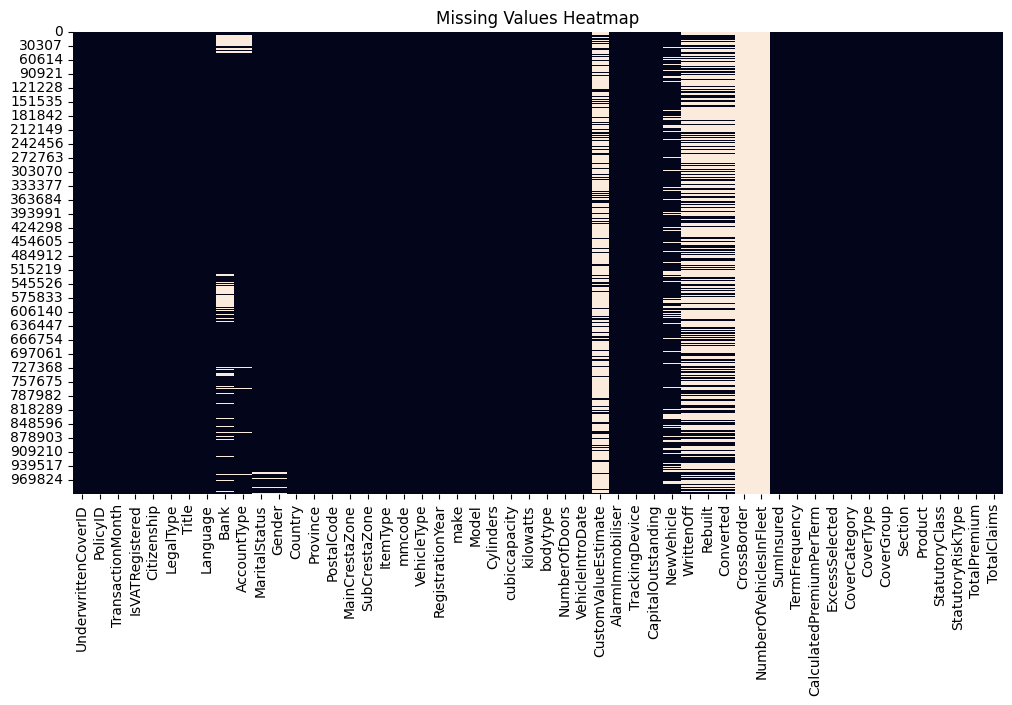

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check missing values
print(df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


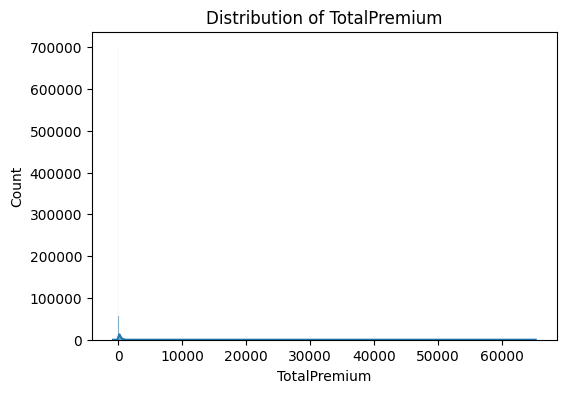

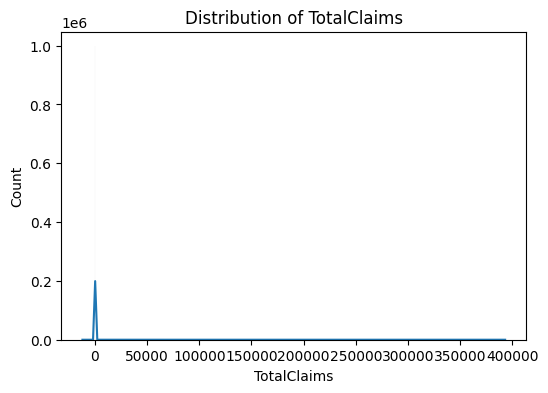

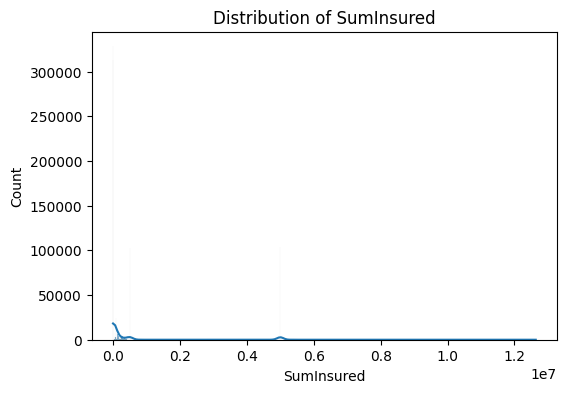

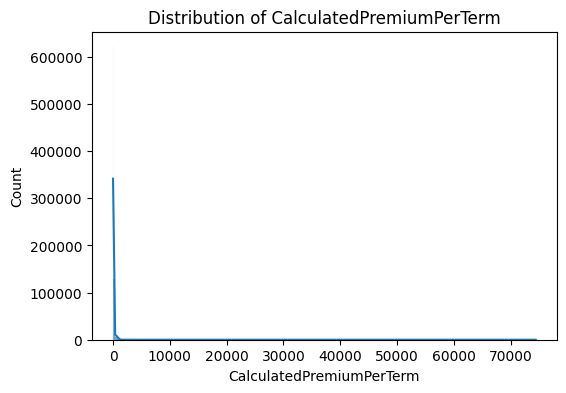

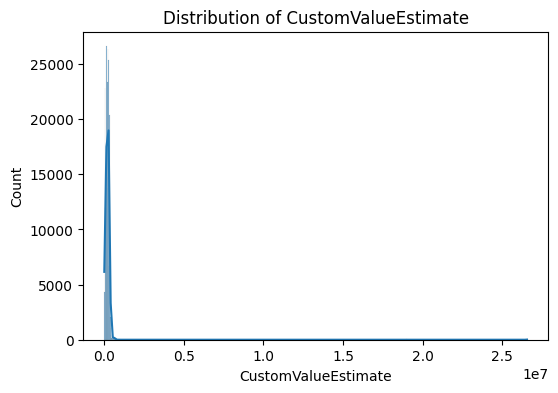

ValueError: Unable to parse string "285700,00" at position 398285

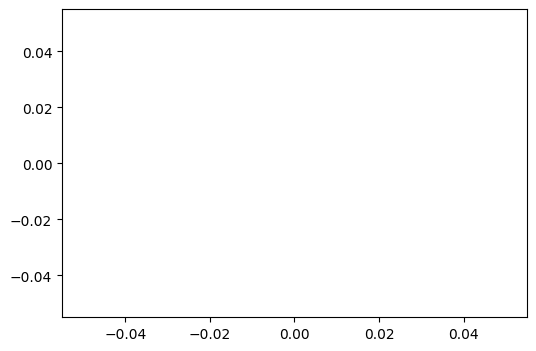

In [5]:
# Numerical columns - histograms
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Categorical columns - bar plots
categorical_cols = ['CoverCategory', 'CoverType', 'make', 'Model', 'VehicleType', 'Bank', 'Province']  # example categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()


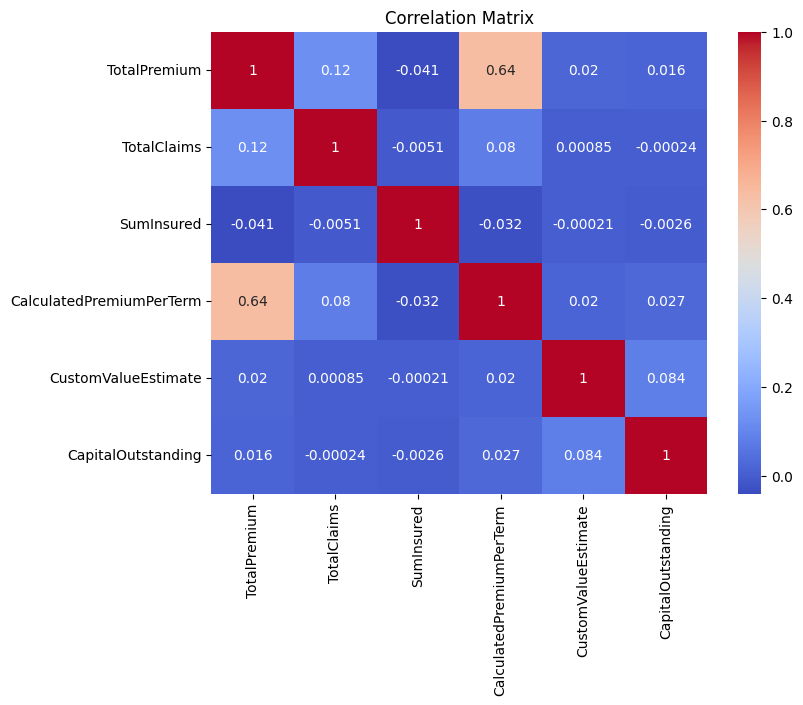

c:\Users\ZAK-TECH\Desktop\KAIM week 3\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


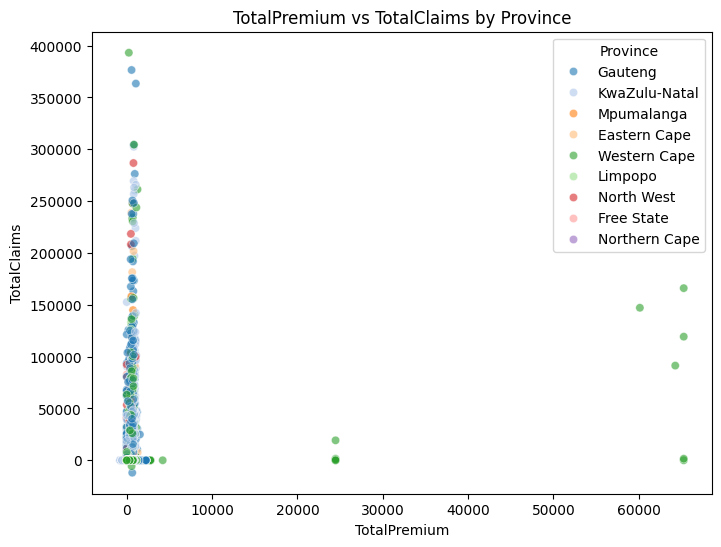

In [ ]:

for col in numerical_cols:
    df[col] = df[col].astype(str).str.replace(",", ".").astype(float)
# Correlation matrix for numerical columns
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Scatter plot: TotalPremium vs TotalClaims colored by Province
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims', hue='Province', palette='tab20', alpha=0.6)
plt.title("TotalPremium vs TotalClaims by Province")
plt.show()


C:\Users\ZAK-TECH\AppData\Local\Temp\ipykernel_21592\2416344546.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=geo_trends, x='Province', y='TotalPremium', palette='viridis')


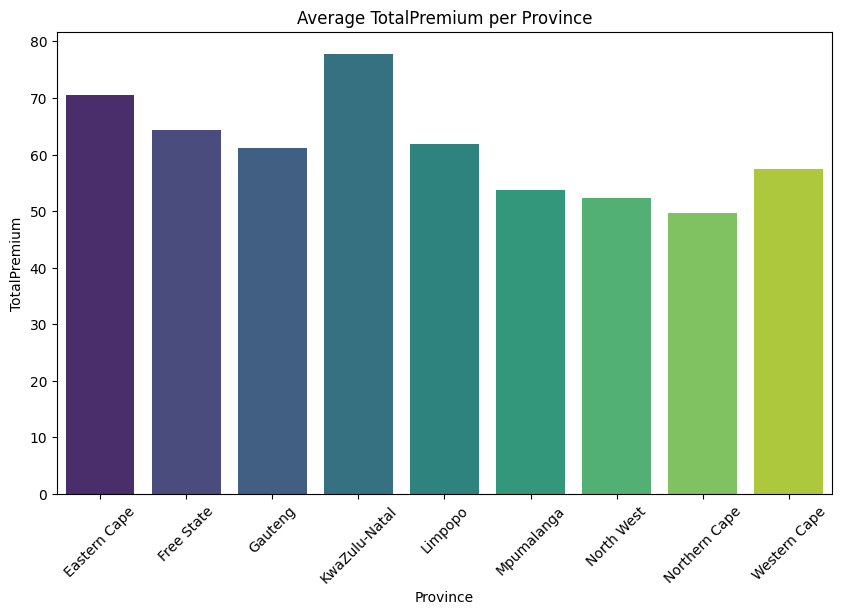

In [ ]:
# Average TotalPremium per Province
geo_trends = df.groupby('Province')[['TotalPremium', 'TotalClaims']].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=geo_trends, x='Province', y='TotalPremium', palette='viridis')
plt.xticks(rotation=45)
plt.title("Average TotalPremium per Province")
plt.show()


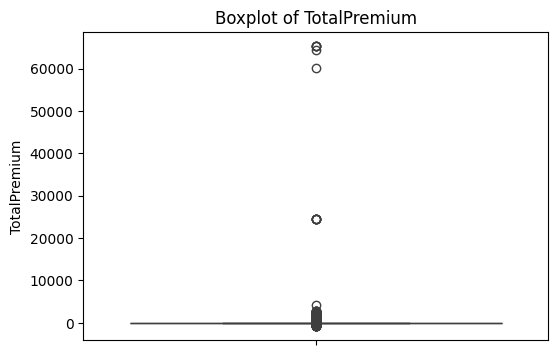

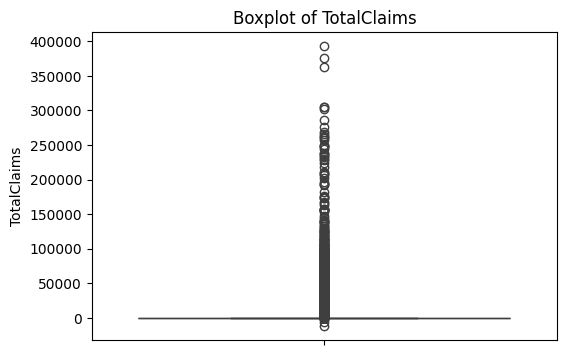

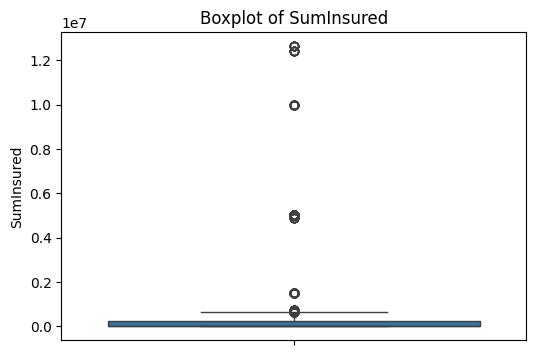

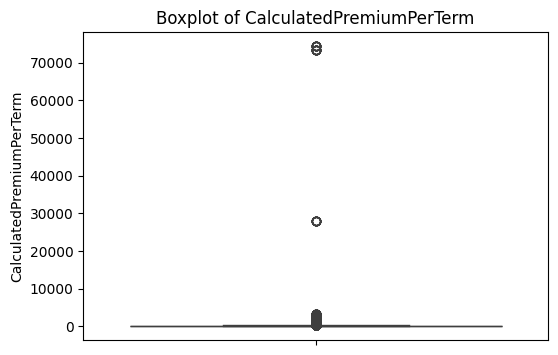

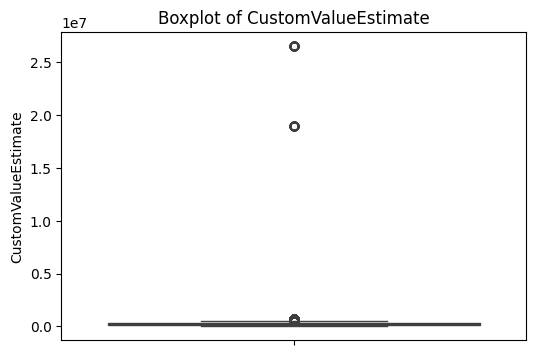

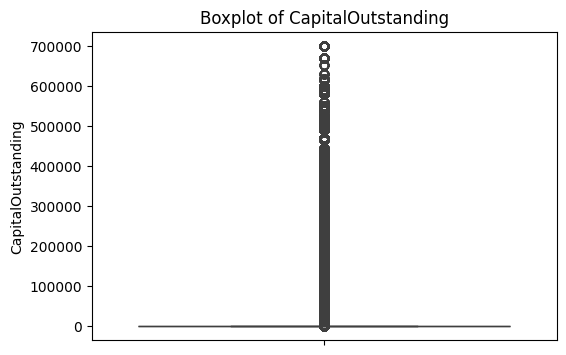

In [ ]:
for col in numerical_cols:
    df[col] = df[col].astype(str).str.replace(",", ".").astype(float)
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.show()


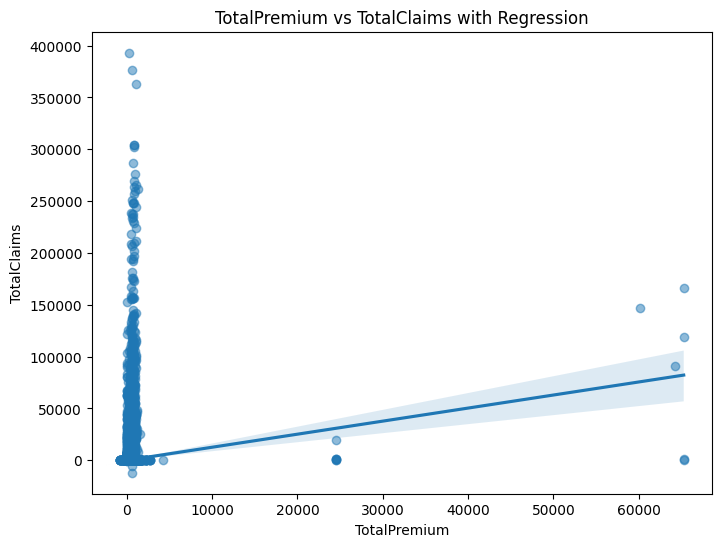

C:\Users\ZAK-TECH\AppData\Local\Temp\ipykernel_21592\623787155.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='CoverType', y='TotalPremium', palette='Set2')


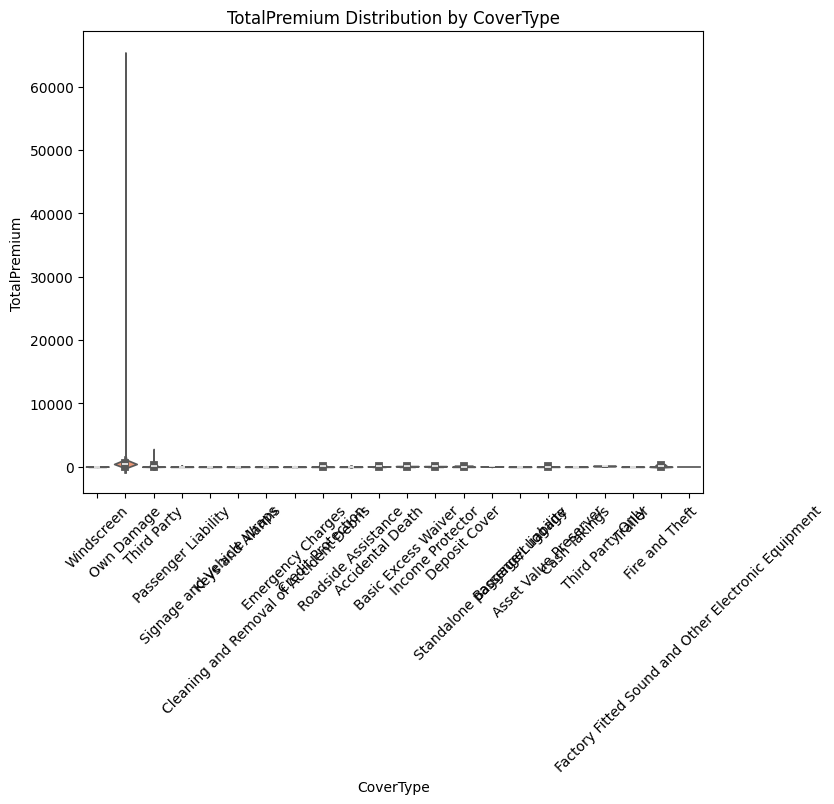

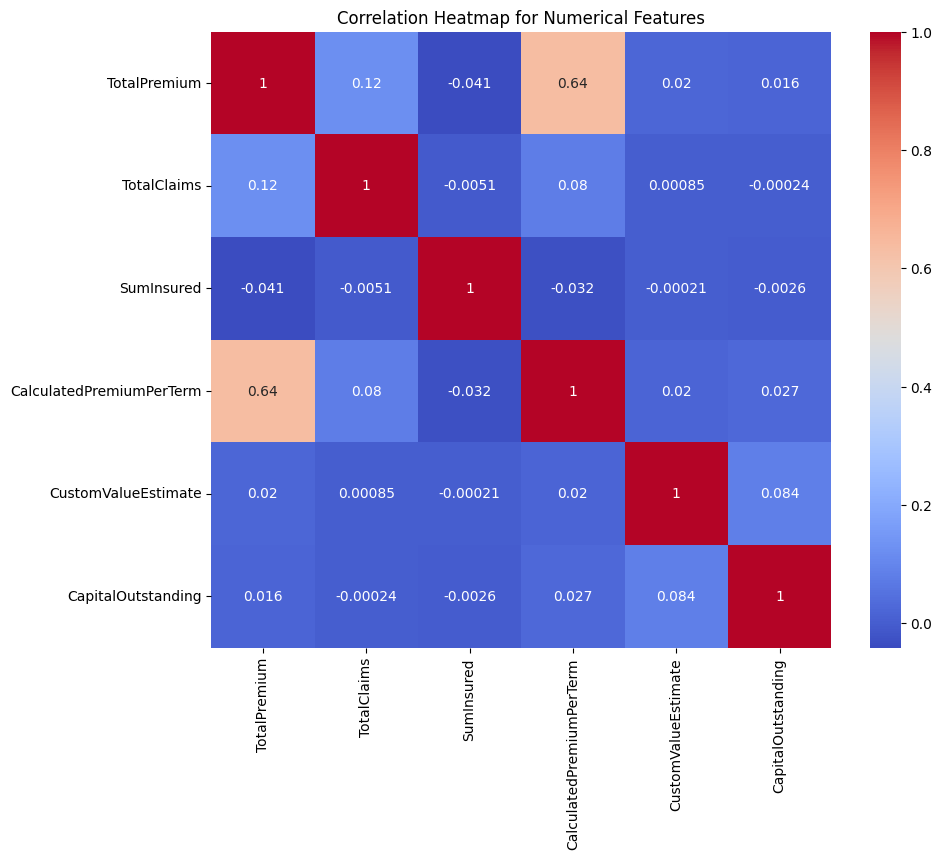

In [ ]:
# 1. TotalPremium vs TotalClaims with regression
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='TotalPremium', y='TotalClaims', scatter_kws={'alpha':0.5})
plt.title("TotalPremium vs TotalClaims with Regression")
plt.show()

# 2. TotalPremium distribution by CoverType
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='CoverType', y='TotalPremium', palette='Set2')
plt.title("TotalPremium Distribution by CoverType")
plt.xticks(rotation=45)
plt.show()

# 3. Heatmap of correlations for all numerical columns
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for Numerical Features")
plt.show()


In [ ]:
num_cols = ["TotalPremium","TotalClaims","SumInsured","CalculatedPremiumPerTerm","CapitalOutstanding","CustomValueEstimate"]
for c in num_cols:
    if c in df.columns:
        df[c] = (df[c].fillna("0")
                   .astype(str)
                   .str.replace(",", ".")
                   .str.replace(r"[^\d\.\-]", "", regex=True)
                   .replace("", "0"))
        df[c] = pd.to_numeric(df[c], errors="coerce").fillna(0.0)

Task 3

In [ ]:
# Create indicators
df["has_claim"] = (df["TotalClaims"] > 0).astype(int)
df["margin"] = df["TotalPremium"] - df["TotalClaims"]

# Claim Frequency (per group): proportion with >=1 claim
# Claim Severity: mean TotalClaims conditional on has_claim==1
def group_kpis(group):
    n = len(group)
    freq = group["has_claim"].mean()
    severity = group.loc[group["has_claim"]==1, "TotalClaims"].mean()
    margin = group["margin"].mean()
    return pd.Series({"count":n, "freq":freq, "severity":severity, "margin":margin})

# Example: KPIs by Province
kpis_by_prov = df.groupby("Province").apply(group_kpis).sort_values("freq", ascending=False)
kpis_by_prov


C:\Users\ZAK-TECH\AppData\Local\Temp\ipykernel_21592\3293104330.py:15: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kpis_by_prov = df.groupby("Province").apply(group_kpis).sort_values("freq", ascending=False)


,count,freq,severity,margin
Province,,,,
Gauteng,393865.0,0.003356,22243.878396,-13.558894
KwaZulu-Natal,169781.0,0.002845,29609.487473,-6.433598
Limpopo,24836.0,0.002698,15171.294187,20.971484
North West,143287.0,0.002436,16963.467035,10.958832
Mpumalanga,52718.0,0.002428,15979.553421,15.016059
Western Cape,170796.0,0.002166,28095.849881,-3.414689
Eastern Cape,30336.0,0.001648,27128.533277,25.833240
Free State,8099.0,0.001358,32265.661085,20.550805
Northern Cape,6380.0,0.001254,11186.313596,35.590527


In [ ]:
from scipy.stats import chi2_contingency, f_oneway, kruskal

# Frequency: contingency table
ct = pd.crosstab(df["Province"], df["has_claim"])
chi2, p_freq, _, _ = chi2_contingency(ct)
print("Province - Claim Frequency: chi2=%.3f, p=%.5f" % (chi2, p_freq))

# Severity: only policies with claims
sev = df[df["has_claim"]==1]
groups = [g["TotalClaims"].values for _, g in sev.groupby("Province") if len(g)>5]
# use Kruskal-Wallis if non-normal or unequal variance
kw_stat, p_sev = kruskal(*groups)
print("Province - Claim Severity (Kruskal): stat=%.3f, p=%.5f" % (kw_stat, p_sev))


Province - Claim Frequency: chi2=104.191, p=0.00000
Province - Claim Severity (Kruskal): stat=106.093, p=0.00000


In [ ]:
top_zips = df["PostalCode"].value_counts().nlargest(10).index
df_z = df[df["PostalCode"].isin(top_zips)]

ct_zip = pd.crosstab(df_z["PostalCode"], df_z["has_claim"])
chi2_zip, p_zip_freq, _, _ = chi2_contingency(ct_zip)
print("Zip - Claim Frequency: p=", p_zip_freq)

sev_z = df_z[df_z["has_claim"]==1]
groups_z = [g["TotalClaims"].values for _, g in sev_z.groupby("PostalCode") if len(g)>5]
kw_z_stat, p_zip_sev = kruskal(*groups_z)
print("Zip - Claim Severity: p=", p_zip_sev)


Zip - Claim Frequency: p= 4.5932778849314244e-12
Zip - Claim Severity: p= 4.180343851689326e-06


In [ ]:
groups_margin = [g["margin"].values for _, g in df_z.groupby("PostalCode") if len(g)>5]
kw_m_stat, p_margin_zip = kruskal(*groups_margin)
print("Zip - Margin (Kruskal): p=", p_margin_zip)


Zip - Margin (Kruskal): p= 0.0


In [ ]:
# Frequency
ct_gender = pd.crosstab(df["Gender"], df["has_claim"])
chi2_g, p_g_freq, _, _ = chi2_contingency(ct_gender)
print("Gender - Claim Frequency p=", p_g_freq)

# Severity
sev_gender = df[df["has_claim"]==1]
from scipy.stats import ttest_ind, mannwhitneyu
male = sev_gender[sev_gender["Gender"]=="Male"]["TotalClaims"]
female = sev_gender[sev_gender["Gender"]=="Female"]["TotalClaims"]
# choose Mann-Whitney if non-normal
u_stat, p_g_sev = mannwhitneyu(male, female, alternative="two-sided")
print("Gender - Claim Severity (Mann-Whitney) p=", p_g_sev)


Gender - Claim Frequency p= 0.026570248768437145
Gender - Claim Severity (Mann-Whitney) p= 0.22351273500106295


In [ ]:
from statsmodels.stats.multitest import multipletests
pvals = [p_zip_freq, p_zip_sev, p_margin_zip]  # example list
rejected, p_adj, _, _ = multipletests(pvals, alpha=0.05, method="bonferroni")
print(p_adj, rejected)


[1.37798337e-11 1.25410316e-05 0.00000000e+00] [ True  True  True]


Task-4

In [7]:
# numeric columns to convert
num_cols = ["TotalPremium","TotalClaims","SumInsured","CalculatedPremiumPerTerm","CapitalOutstanding","CustomValueEstimate"]
for c in num_cols:
    if c in df.columns:
        df[c] = (df[c].fillna("0")
                   .astype(str)
                   .str.replace(",", ".")
                   .str.replace(r"[^\d\.\-]", "", regex=True)
                   .replace("", "0"))
        df[c] = pd.to_numeric(df[c], errors="coerce")

# common derived features
df["has_claim"] = (df["TotalClaims"].fillna(0) > 0).astype(int)
df["vehicle_age"] = np.where(df["RegistrationYear"].notna(),
                              2025 - pd.to_numeric(df["RegistrationYear"], errors="coerce"),
                              np.nan)
df["margin"] = df["TotalPremium"].fillna(0) - df["TotalClaims"].fillna(0)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Select features (example set — adjust)
features = ["vehicle_age","make","Model","VehicleType","Province","PostalCode","SumInsured","CalculatedPremiumPerTerm","TermFrequency"]
# drop rows missing target later per-model
df_model = df.copy()

# define columns types
num_feats = [c for c in features if c in df.columns and df[c].dtype != object]
cat_feats = [c for c in features if c in df.columns and c not in num_feats]

num_pipe = Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="MISSING")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preproc = ColumnTransformer([("num", num_pipe, num_feats), ("cat", cat_pipe, cat_feats)])


In [9]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# prepare data
sev_df = df_model[df_model["has_claim"]==1].dropna(subset=["TotalClaims"])
X = sev_df[features]
y = sev_df["TotalClaims"].astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Random Forest pipeline
rf_pipe = Pipeline([("preproc", preproc), ("model", RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1))])
rf_pipe.fit(X_train, y_train)
y_pred = rf_pipe.predict(X_test)

# metrics
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RF Severity RMSE:", rmse, "R2:", r2)

# XGBoost
xgb_pipe = Pipeline([("preproc", preproc), ("model", XGBRegressor(n_estimators=200, learning_rate=0.05, tree_method="hist", random_state=42))])
xgb_pipe.fit(X_train, y_train)
y_pred_xgb = xgb_pipe.predict(X_test)
print("XGB Severity RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)), "R2:", r2_score(y_test, y_pred_xgb))


RF Severity RMSE: 36361.805944732856 R2: 0.10872451558206675
XGB Severity RMSE: 36246.34541655899 R2: 0.11437570664579821


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Preprocess and convert to float32 to avoid memory explosion
X = preproc.fit_transform(df_model[features]).astype("float32")
y = df_model["has_claim"].astype(int)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# Fast RandomForest
clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=12,
    max_features="sqrt",
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)

clf.fit(X_train, y_train)

# Predictions
y_prob = clf.predict_proba(X_test)[:, 1]
y_pred = clf.predict(X_test)

print("AUC:", roc_auc_score(y_test, y_prob))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))


In [ ]:
# naive premium model example (predict CalculatedPremiumPerTerm)
if "CalculatedPremiumPerTerm" in df.columns:
    df_prem = df_model.dropna(subset=["CalculatedPremiumPerTerm"])
    X = df_prem[features]
    y = df_prem["CalculatedPremiumPerTerm"].astype(float)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    prem_pipe = Pipeline([("preproc", preproc), ("model", XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42, tree_method="hist"))])
    prem_pipe.fit(X_train, y_train)
    y_pred = prem_pipe.predict(X_test)
    print("Premium RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)), "R2:", r2_score(y_test, y_pred))


In [ ]:
import shap, joblib
# Example for XGBoost severity model (xgb_pipe)
# Extract underlying model after preproc transformation:
X_sample = X_train.copy()
# compute transformed features for SHAP using preproc only
transformed = preproc.fit_transform(X_sample)
# If using XGBRegressor inside pipeline, get model
model_xgb = xgb_pipe.named_steps['model']

explainer = shap.Explainer(model_xgb)
# Use preproc to transform test set
X_test_trans = preproc.transform(X_test)
shap_values = explainer(X_test_trans)

# summary plot (top features)
shap.summary_plot(shap_values, X_test_trans, feature_names = (preproc.get_feature_names_out()))
# get mean absolute SHAP per feature
import numpy as np, pandas as pd
feat_imp = pd.DataFrame({"feature": preproc.get_feature_names_out(), "shap_abs": np.abs(shap_values.values).mean(axis=0)})
feat_imp = feat_imp.sort_values("shap_abs", ascending=False).head(10)
print(feat_imp)
